In [13]:
pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 3.7 MB/s eta 0:00:00m eta 0:00:010:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
import random
import scipy
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def generate_points(n):
    points = sorted([random.uniform(0, 1) for _ in range(n)])
    return points
def model_function(n):
    return 1 / (n + 1) ** k

In [15]:
def calculate_smallest_segment_length(points):
    min_length = float('inf')
    for i in range(len(points) - 1):
        segment_length = points[i+1] - points[i]
        if segment_length < min_length:
            min_length = segment_length
    return min_length

In [16]:
n = 10
points = generate_points(n)
print("Generated points:", points)
min_segment_length = calculate_smallest_segment_length(points)
print("Length of smallest segment:", min_segment_length)

Generated points: [0.019246832008956383, 0.11905969181162124, 0.4761869952415365, 0.47818364877967556, 0.6059049468771786, 0.6631928587922119, 0.7116192333582612, 0.9540984853356655, 0.9945830560219545, 0.9972407801342458]
Length of smallest segment: 0.0019966535381390482


In [17]:
def plot_graph(n_values, fval, smallest_lengths):
    plt.plot(n_values, smallest_lengths, marker='.', linestyle='',color='blue', label = 'Smallest Segment Length')
    plt.plot(n_values, fval, marker='o', linestyle=':', color='red', label='$\\frac{1}{{(n+1)}^2}$')
    plt.scatter(n_values, smallest_lengths, color='blue')
    plt.scatter(n_values, fval, color='red')
    plt.xlabel('Number of Points (n)')
    plt.ylabel('Smallest Segment Length')
    plt.title('Smallest Segment Length vs Number of Points')
    plt.ylim(0, max(smallest_lengths) + 1e-9)  # Adjust the y-axis limits
    plt.grid(True)
    plt.legend()
    plt.show()

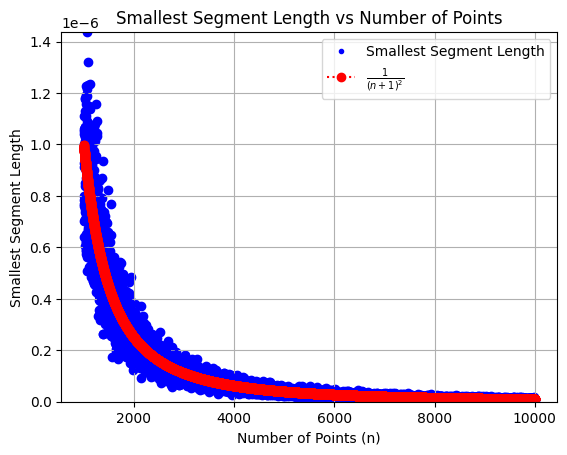

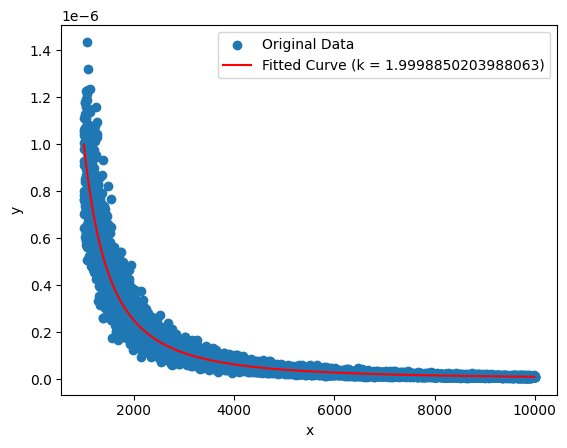

In [22]:
ns = []
fval = []
for i in range(1000,10000):
    ns.append(i);
smallest_lengths = []
for n in ns:
    temp=[]
    #print(n)
    for i in range(0,20):
        points = generate_points(n)
        smallest_length = calculate_smallest_segment_length(points)
        temp.append(smallest_length)
    
    smallest_lengths.append(sum(temp)/len(temp))
    fval.append(1/(n+1)**2)
    #print("Generated points:", points)
    #print("Length of smallest segment:", smallest_length)
plot_graph(ns, fval, smallest_lengths)
popt, pcov = curve_fit(model_function, ns, smallest_lengths)

# Extract the optimal value for the parameter k
k_estimate = popt[0]

# Plot the original data
plt.scatter(ns, smallest_lengths, label='Original Data')

# Plot the fitted curve for each value of ns
fitted_curve = [model_function(n, k_estimate) for n in ns]
plt.plot(ns, fitted_curve, color='red', label=f'Fitted Curve (k = {k_estimate})')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
